In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import LabelEncoder

from sklearn.impute import SimpleImputer # imputer fills missing values with median

from sklearn.preprocessing import LabelBinarizer #encoding in one step

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import FeatureUnion 

In [2]:
df=pd.read_csv('housing.csv')

df #display variable

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.info #display contents of variable as matrix

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [4]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df.describe() #self describe variable

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


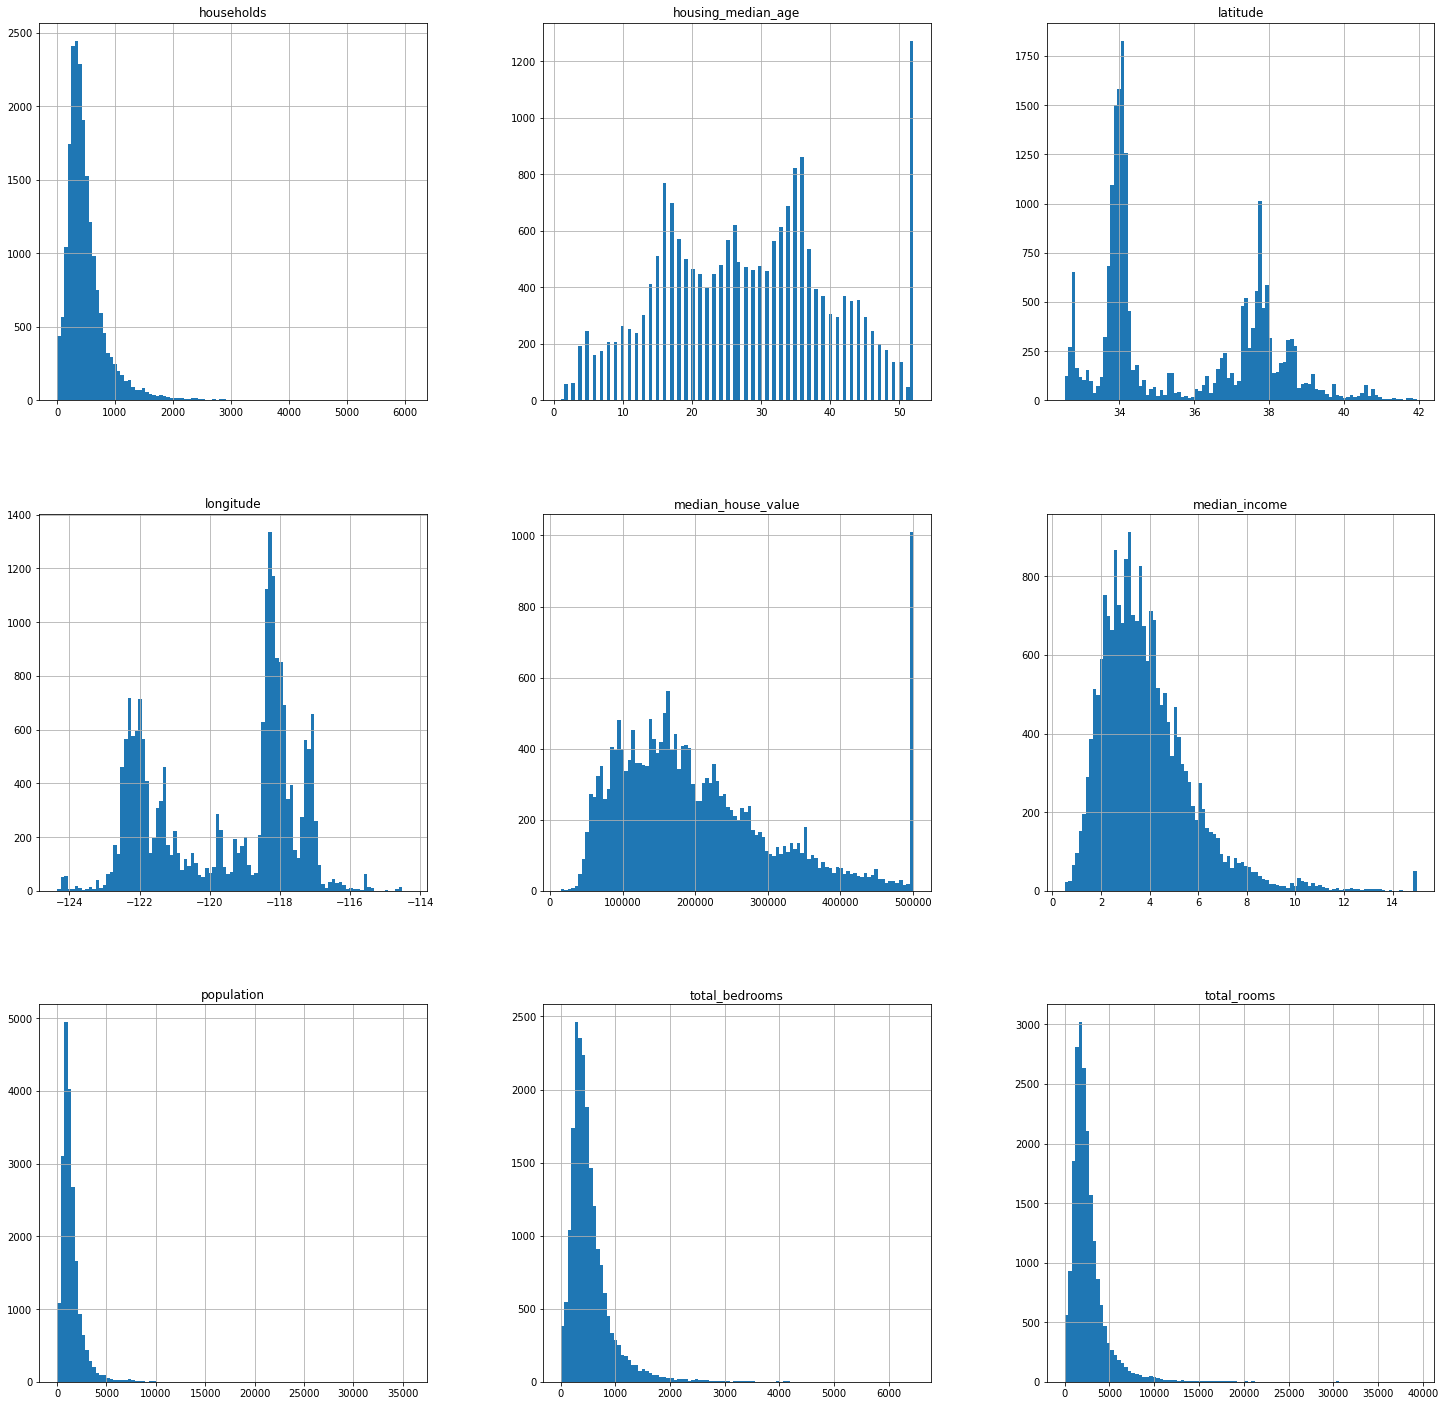

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

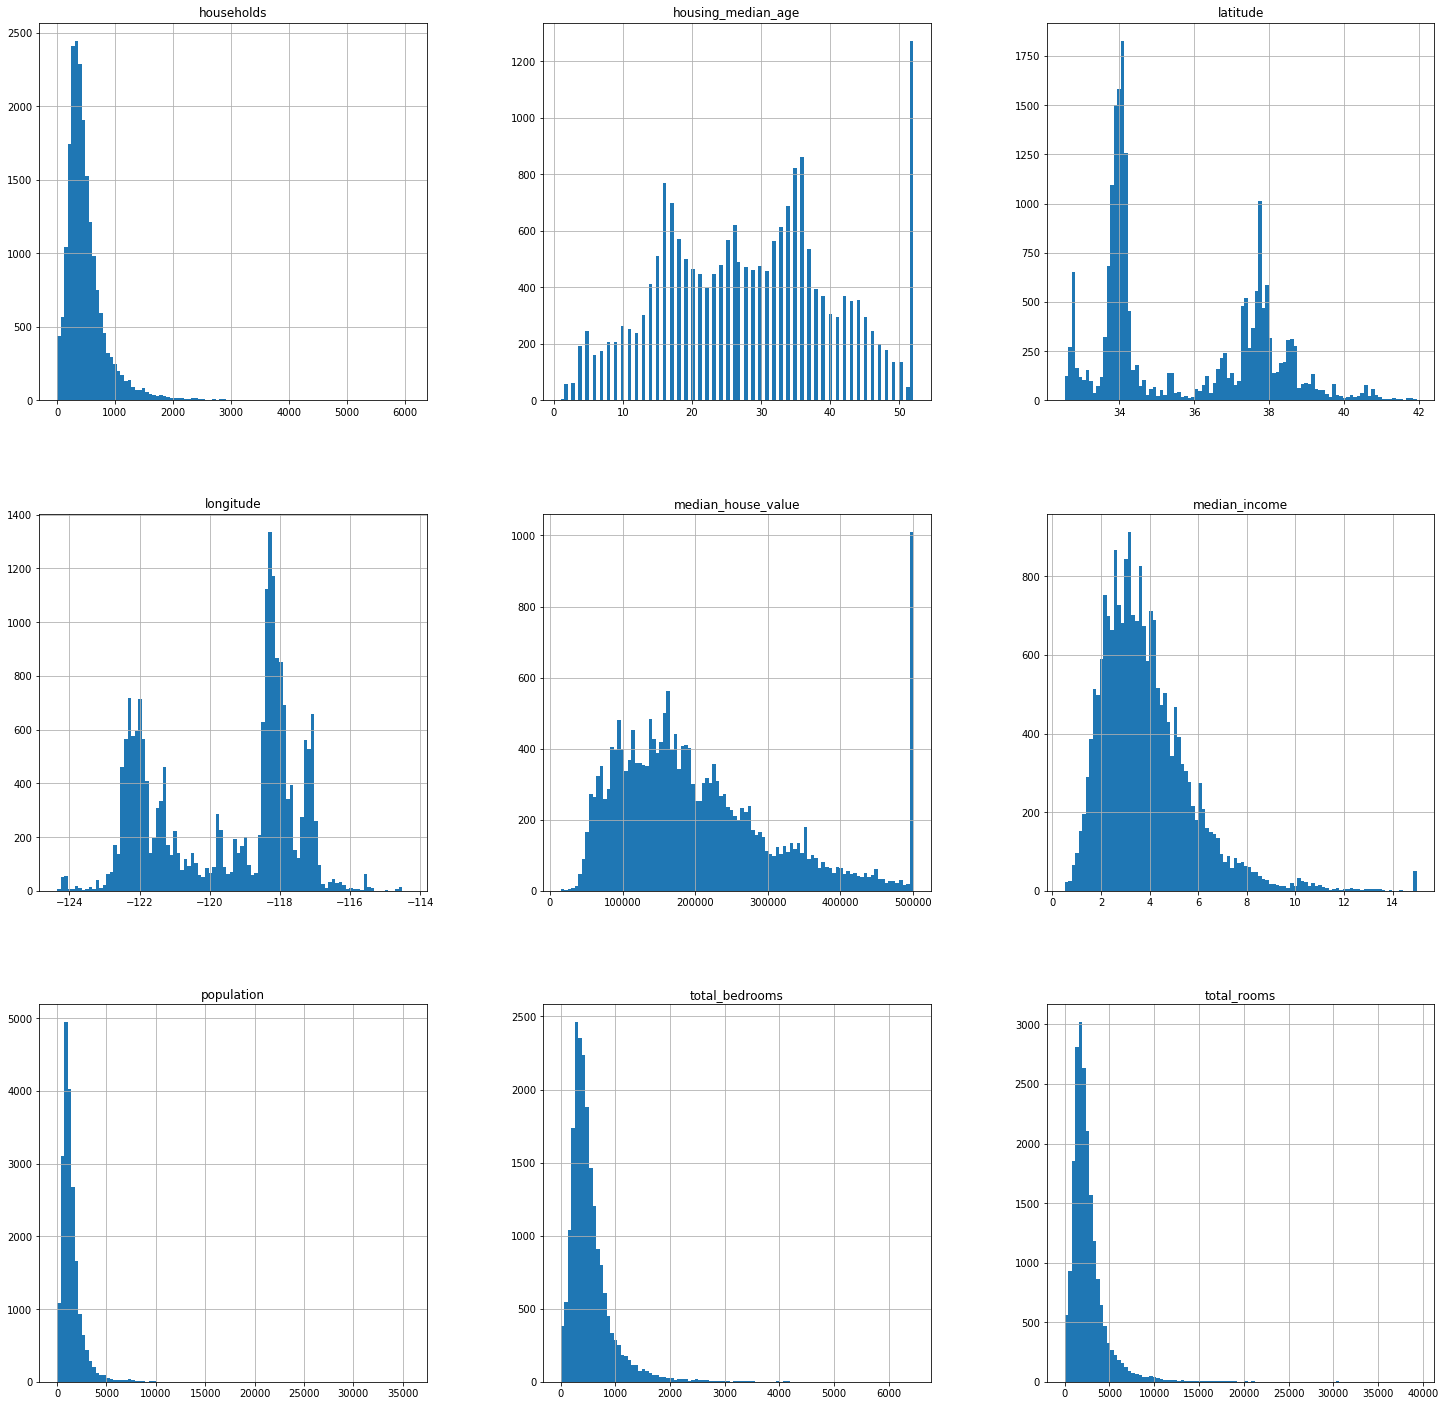

In [6]:
plt.show(df.hist(bins=100,figsize=(25,25))) #plot as binshistogram with 100 bins

In [7]:
df['income_cat'] = np.ceil(df['median_income']/1.5) # create new field for classification
df["income_cat"]

0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [8]:
df["income_cat"].where(df["income_cat"]<5,5.0,inplace=True) 
# as no. of values greater than 5 is less hence keep them in last category
df["income_cat"]

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [9]:
train_set, test_set = train_test_split(df,test_size=.2,random_state=42)
# split records in test (20%) and train (80%) set over random state

split=StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=42) # ensure uniform splitting in all categories : normalization
for train_index,test_index in split.split(df,df["income_cat"]):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]

In [10]:
df["income_cat"].value_counts()/len(df) # percentage of records per cat in df

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [11]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set) # % of records per cat in train set

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [12]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set) # % of records per cat in test set

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [13]:
for set in(strat_train_set,strat_test_set): # delete income_cat column : user-defined
    set.drop("income_cat",axis=1,inplace=True)
df = strat_train_set.copy()

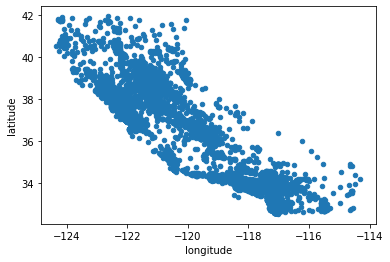

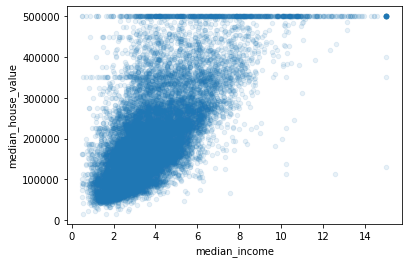

In [14]:
plt.show(strat_train_set.plot(kind="scatter",x="longitude", y="latitude"))
plt.show(strat_train_set.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1))

In [15]:
corr_matrix=df.corr() # correlation of all feature wrt to one feature
corr_matrix["median_house_value"].sort_values(ascending=False) # corr wrt house value

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [16]:
df_num=df.drop("ocean_proximity", axis=1) #store all numeric features

imputer=SimpleImputer(strategy='median')

imputer.fit(df_num) #hold missing values

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [17]:
imputer.statistics_
df_num.median().values
x=imputer.transform(df_num) # fill median in missing places

In [18]:
df_tr=pd.DataFrame(x,columns=df_num.columns)
df = strat_train_set.drop("median_house_value", axis = 1)
df_tr_labels=df_tr["median_house_value"].copy()
df_tr_labels

0        286600.0
1        340600.0
2        196900.0
3         46300.0
4        254500.0
           ...   
16507    240200.0
16508    113000.0
16509     97800.0
16510    225900.0
16511    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [19]:
encoder = LabelEncoder()
housing_cat = df["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [20]:
print(housing_cat_encoded)

[0 0 4 ... 1 0 3]


In [21]:
print(encoder.classes_) # cannot corelate hence use one hot

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [22]:
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))

In [23]:
print(housing_cat_1hot)
print(housing_cat_1hot.toarray())

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 0)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 3)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 1)	1.0
  (16489, 4)	1.0
  (16490, 3)	1.0
  (16491, 0)	1.0
  (16492, 3)	1.0
  (16493, 1)	1.0
  (16494, 1)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 3)	1.0
  (16498, 1)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 0)	1.0
  (16502, 4)	1.0
  (16503, 0)	1.0
  (16504, 1)	1.0
  (16505, 1)	1.0
  (16506, 0)	1.0
  (16507, 1)	1.0
  (16508, 1)	1.0
  (16509, 1)	1.0
  (16510, 0)	1.0
  (16511, 3)	1.0
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [24]:
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
print(housing_cat_1hot)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 ...
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]]


In [25]:
df_tr=pd.DataFrame(x,columns=df_num.columns)
print(df_tr)
df = strat_train_set.drop("median_house_value", axis = 1)
df_tr_labels=df_tr["median_house_value"].copy()
df_tr_labels

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -121.89     37.29                38.0       1568.0           351.0   
1        -121.93     37.05                14.0        679.0           108.0   
2        -117.20     32.77                31.0       1952.0           471.0   
3        -119.61     36.31                25.0       1847.0           371.0   
4        -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
16507    -118.13     34.20                46.0       1271.0           236.0   
16508    -117.56     33.88                40.0       1196.0           294.0   
16509    -116.40     34.09                 9.0       4855.0           872.0   
16510    -118.01     33.82                31.0       1960.0           380.0   
16511    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  media

0        286600.0
1        340600.0
2        196900.0
3         46300.0
4        254500.0
           ...   
16507    240200.0
16508    113000.0
16509     97800.0
16510    225900.0
16511    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [26]:
num_attribs = list(df.drop("ocean_proximity", axis=1))
cat_attribs = ["ocean_proximity"] 

In [27]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names 
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [28]:
num_pipeline = Pipeline([
    ("Selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy = "median")),
   # ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])

In [29]:
class NewLabelBinarizer(LabelBinarizer):
    def fit(self,X,y=None):
        return super(NewLabelBinarizer,self).fit(X)
    def transform(self,X,y=None):
        return super(NewLabelBinarizer,self).transform(X)
    def fit_transform(self,X,y=None):
        return super(NewLabelBinarizer,self).fit(X).transform(X)

In [30]:
cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ('label_binarizer', NewLabelBinarizer()),
])

In [31]:
full_pipeline = FeatureUnion(transformer_list = [("num_pipeline", num_pipeline),("cat_pipeline", cat_pipeline),])
df_prepared = full_pipeline.fit_transform(df)
df_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [32]:
df_prepared.shape

(16512, 13)

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_tr_labels)
some_data = df.iloc[:5]
some_labels = df_tr_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t", list(some_labels))

Predictions:	 [211574.39523833 321345.10513719 210947.519838    61921.01197837
 192362.32961119]
Labels:	 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]
